In [45]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('s1.jpeg')
img2 = cv.imread('s2.jpeg')
img7 = cv.imread('k2.jpeg')
img8 = cv.imread('k3.jpeg')
img9 = cv.imread('d2.jpeg')
img10 = cv.imread('d3.jpeg')






gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
gray7= cv.cvtColor(img7,cv.COLOR_BGR2GRAY)
gray8= cv.cvtColor(img8,cv.COLOR_BGR2GRAY)
gray9= cv.cvtColor(img9,cv.COLOR_BGR2GRAY)
gray10= cv.cvtColor(img10,cv.COLOR_BGR2GRAY)




sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)
kp7, des7 = sift.detectAndCompute(gray7,None)
kp8, des8 = sift.detectAndCompute(gray8,None)
kp9, des9 = sift.detectAndCompute(gray9,None)
kp10, des10 = sift.detectAndCompute(gray10,None)


#print(np.size(des1[1]))
#print(des1[1])
#print(dir(kp1[1]))
#print(len(kp1))
#print(kp1[1].pt)
#print(kp1[1].angle)
#print(kp1[1].octave)
#print(kp1[1].size)



#img1=cv.drawKeypoints(gray,kp1,img1)
#img2=cv.drawKeypoints(gray,kp2,img2)

#cv.imwrite('sift_keypoints1.jpg',img1)
#cv.imwrite('sift_keypoints2.jpg',img2)



Its a match with pic1


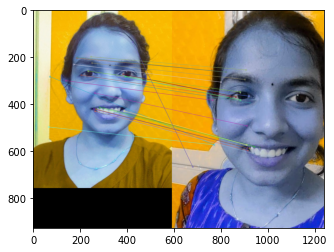

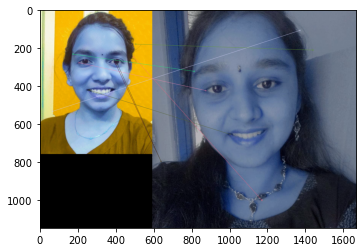

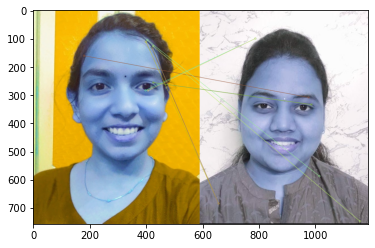

24
8
10


In [46]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches1 = bf.knnMatch(des2,des1,k=2)
matches2 = bf.knnMatch(des2,des10,k=2)
matches3 = bf.knnMatch(des2,des8,k=2)



# Apply ratio test
good1 = []
good2 = []
good3 = []


for m,n in matches1:
    if m.distance < 0.75*n.distance:
        good1.append([m])
for m,n in matches2:
    if m.distance < 0.75*n.distance:
        good2.append([m])
for m,n in matches3:
    if m.distance < 0.75*n.distance:
        good3.append([m])
# cv.drawMatchesKnn expects list of lists as matches
if(len(good1)>10 and len(good1)==max(len(good1),len(good2),len(good3))):
    print("Its a match with pic1")
img3 = cv.drawMatchesKnn(img2,kp2,img1,kp1,good1,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

if(len(good2)>10 and len(good2)==max(len(good1),len(good2),len(good3))):
    print("Its a match with pic2")
img4 = cv.drawMatchesKnn(img2,kp2,img10,kp10,good2,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4),plt.show()

if(len(good3)>10 and len(good3)==max(len(good1),len(good2),len(good3))):
    print("Its a match with pic3")
img5 = cv.drawMatchesKnn(img2,kp2,img8,kp8,good3,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img5),plt.show()



print(len(good1))
print(len(good2))
print(len(good3))









In [22]:
for m,n in matches1:
    print(m.distance,n.distance)

155.22242736816406 202.36106872558594
327.4797668457031 378.9458923339844
230.93072509765625 234.99574279785156
125.21981048583984 137.4481658935547
183.5674285888672 214.29185485839844
67.0969467163086 93.16651916503906
83.78543853759766 108.33281707763672
75.76278686523438 95.69221496582031
102.85912322998047 111.61093139648438
69.35416412353516 83.57630920410156
73.62744140625 88.91568756103516
128.65457153320312 129.12010192871094
122.3519515991211 134.66253662109375
75.74298858642578 101.08907318115234
101.54801940917969 103.09703826904297
207.5548095703125 213.25572204589844
377.0278625488281 397.56256103515625
346.7982177734375 374.3127136230469
321.8974914550781 332.580810546875
418.81500244140625 447.4997253417969
342.88189697265625 344.46624755859375
278.2552795410156 287.9045104980469
107.37783813476562 117.8431167602539
256.1191101074219 261.7135925292969
248.66241455078125 274.0967102050781
192.68887329101562 196.41537475585938
261.5415954589844 285.74462890625
283.5224914

In [23]:
print(des1[1])
print(des2[1])

[ 12.   3.   0.   1.  14.   4.   0.   1.  18.   1.   0.   3.  46.   8.
   1.  14.  45.   1.   0.   0.  48.  68.  19.  61.   0.   0.   0.   4.
 149. 149.   5.   2.   8.   5.   2.   8.  15.   0.   0.   1.  54.  16.
   3.  23.  59.   0.   0.   4. 149.  27.   1.   1.  29.  50.   8.  30.
   9.   0.   0.   0. 149. 149.   4.   4.   0.   1.   3.  13.  14.   1.
   0.   0.  56.   3.   0.  13.  50.   7.   2.  22. 149.   7.   0.   0.
   7.  14.   2.  56.  28.   0.   0.   0. 149. 149.   2.   9.   0.   0.
   3.   4.   8.   2.   0.   0.  54.   4.   0.   3.  14.   8.   2.  14.
 149.   6.   0.   0.   0.   1.   1.  25.  35.   0.   0.   0. 105.  78.
   2.   7.]
[ 11.   1.   0.   0.   0.   0.   0.   2.  43.   0.   0.   0.   0.   0.
   0.  14.   6.   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   0.
   0.   0.   0.   0.  69.   7.   1.   0.   0.   4.  10.   8. 151.  21.
   0.   0.   0.   0.   0.  71. 100.  29.   5.   0.   0.   1.  17.  45.
   0.   3.   1.   0.   0.   1.  18.   1.  36.   1.   0.   0.   0.

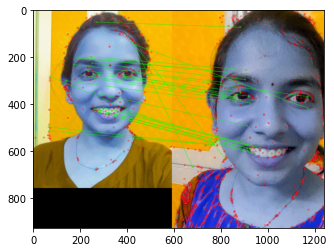

29


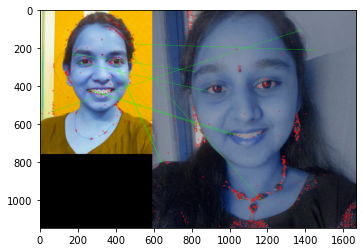

9


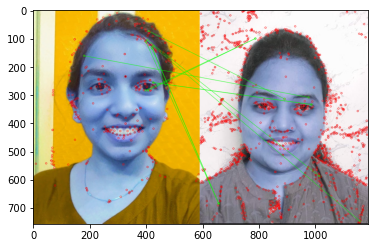

11


In [35]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des2,des1,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
count=0
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]
        count=count+1
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img2,kp2,img1,kp1,matches,None,**draw_params)
plt.imshow(img3,),plt.show()
print(count)

matches = flann.knnMatch(des2,des10,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
count=0
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]
        count=count+1
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img2,kp2,img10,kp10,matches,None,**draw_params)
plt.imshow(img3,),plt.show()
print(count)

matches = flann.knnMatch(des2,des8,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
count=0
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]
        count=count+1
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img2,kp2,img8,kp8,matches,None,**draw_params)
plt.imshow(img3,),plt.show()
print(count)